# Airlines

> 대회 안내
- target : 0 or 1 -> 분류

> 평가 산식
- Accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rc('figure', facecolor='w', edgecolor='w')

# Data

> Null
- Null 값은 없음

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
# id 행 제거
df_train.drop('id', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)

In [4]:
print("train's shape : {}".format(df_train.shape))
print("test's shape : {}".format(df_test.shape))

train's shape : (3000, 23)
test's shape : (2000, 22)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [6]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


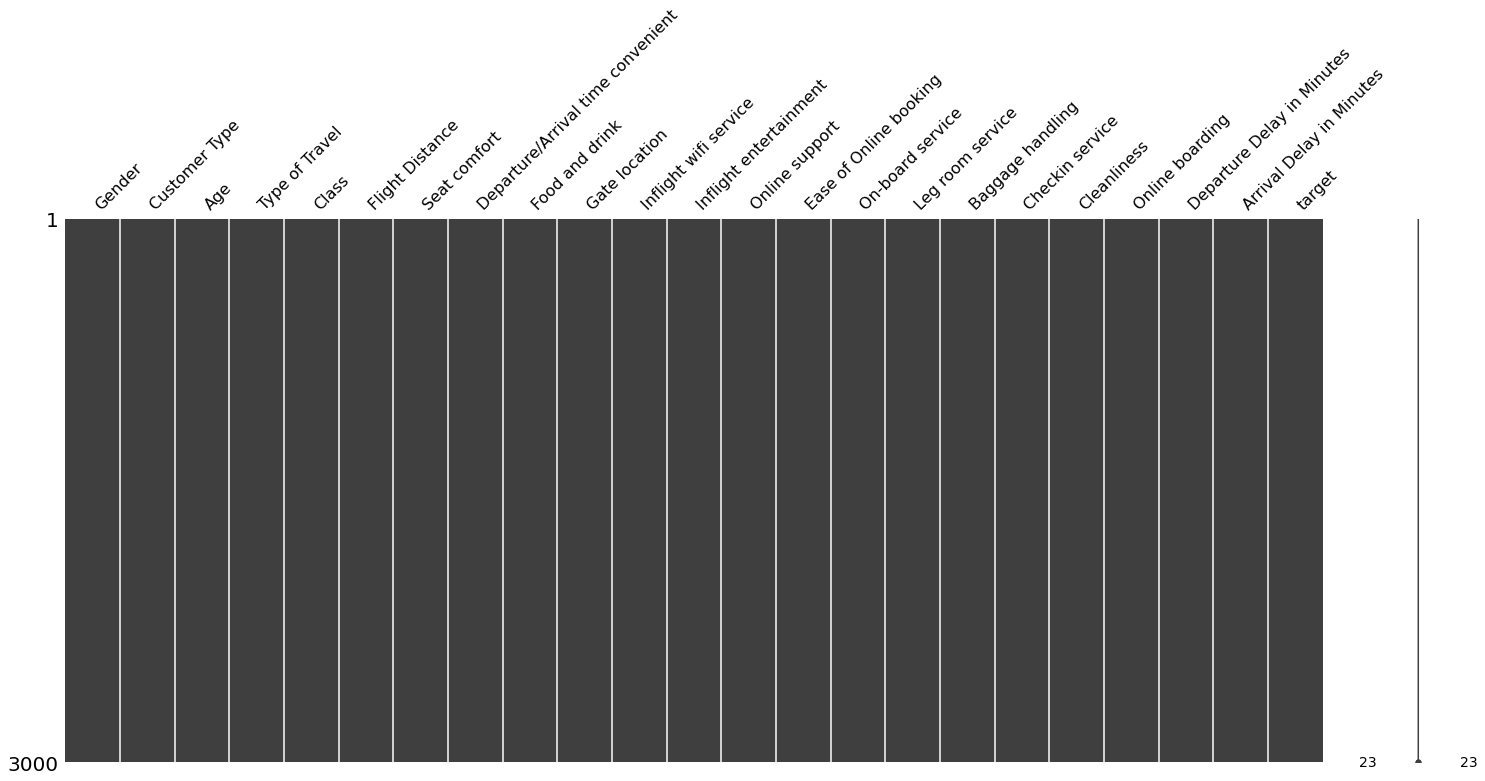

In [7]:
import missingno as msno
msno.matrix(df_train)

# EDA

In [8]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [9]:
cat_cols = df_train.select_dtypes(include='object').columns.to_list()
num_cols = df_train.select_dtypes(exclude='object').columns.to_list()

In [10]:
num_cols.remove('target')

## Target

In [11]:
df_train['target'].value_counts()

1    1668
0    1332
Name: target, dtype: int64

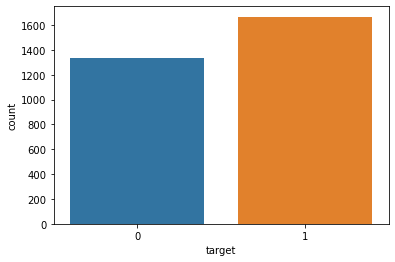

In [12]:
sns.countplot(df_train['target'])

## 범주형 & 이산형

In [13]:
def discrete_feat(feature):
    print('value count : \n{}\n'.format(df_train[feature].value_counts().sort_index()))
    print('그룹별 만족(target) value count : \n{}\n'.format(df_train['target'].groupby(df_train[feature]).sum().sort_index()))
    print('그룹별 만족(target) 비율 : \n{}\n'.format(df_train['target'].groupby(df_train[feature]).mean().sort_index()))

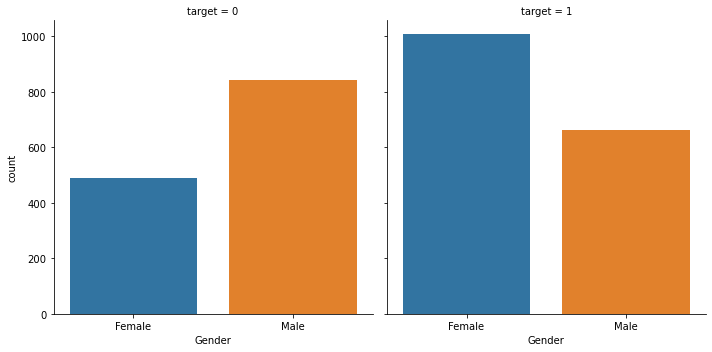

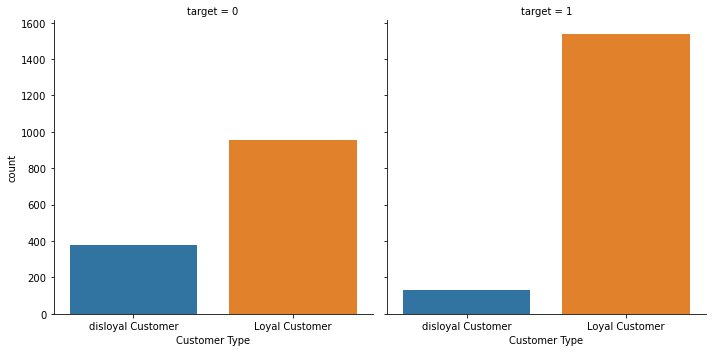

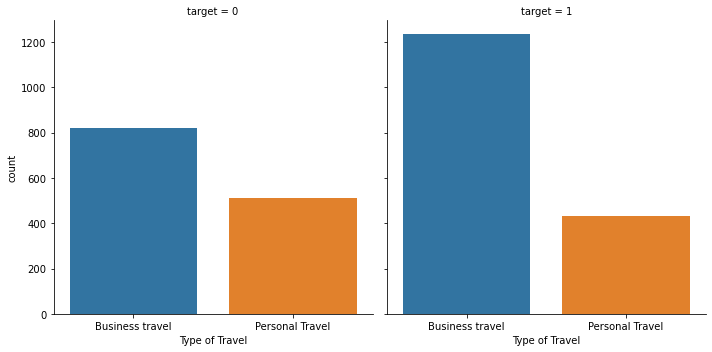

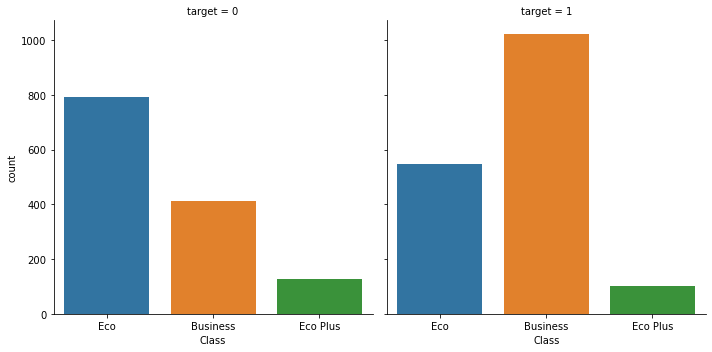

In [14]:
def show_cat_plot(df, columns):
    for column in columns:
        sns.catplot(x=column, col='target', data=df, kind='count')
        plt.show()
        
show_cat_plot(df_train,cat_cols)

In [ ]:
# def show_dist_plot(df, columns):
#     for column in columns:
#         print('[',column,']')
#         f,ax=plt.subplots(1,2,figsize=(12,3))
#         sns.distplot(x=df[column],ax=ax[0])
#         sns.violinplot(x=df['target'],y=df[column],ax=ax[1])
#         plt.show()
        
# show_dist_plot(df_train,num_cols)

### Gender

> 성별 : Male / Female
- 남자, 여자 수는 비슷함
- 만족비율은 여자가 더 높음

In [16]:
discrete_feat('Gender')

value count : 
Female    1498
Male      1502
Name: Gender, dtype: int64

그룹별 만족(target) value count : 
Gender
Female    1007
Male       661
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Gender
Female    0.67223
Male      0.44008
Name: target, dtype: float64



### Customer Type

In [17]:
discrete_feat('Customer Type')

value count : 
Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64

그룹별 만족(target) value count : 
Customer Type
Loyal Customer       1536
disloyal Customer     132
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Customer Type
Loyal Customer       0.617115
disloyal Customer    0.258317
Name: target, dtype: float64



### Type of Travel

In [18]:
discrete_feat('Type of Travel')

value count : 
Business travel    2053
Personal Travel     947
Name: Type of Travel, dtype: int64

그룹별 만족(target) value count : 
Type of Travel
Business travel    1234
Personal Travel     434
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Type of Travel
Business travel    0.601072
Personal Travel    0.458289
Name: target, dtype: float64



### Class

In [19]:
discrete_feat('Class')

value count : 
Business    1434
Eco         1337
Eco Plus     229
Name: Class, dtype: int64

그룹별 만족(target) value count : 
Class
Business    1021
Eco          546
Eco Plus     101
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Class
Business    0.711994
Eco         0.408377
Eco Plus    0.441048
Name: target, dtype: float64



### Seat comfort

> 좌석 편함

In [20]:
discrete_feat('Seat comfort')

value count : 
0    106
1    476
2    655
3    680
4    651
5    432
Name: Seat comfort, dtype: int64

그룹별 만족(target) value count : 
Seat comfort
0    105
1    205
2    229
3    269
4    430
5    430
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Seat comfort
0    0.990566
1    0.430672
2    0.349618
3    0.395588
4    0.660522
5    0.995370
Name: target, dtype: float64



### Departure/Arrival time convenient

> 출발/도착 시간 편의성
- 모든 class가 비슷함 -> target 예측하는데 큰 영향 없을 듯 -> 피쳐 삭제

In [21]:
discrete_feat('Departure/Arrival time convenient')

value count : 
0    154
1    453
2    533
3    562
4    666
5    632
Name: Departure/Arrival time convenient, dtype: int64

그룹별 만족(target) value count : 
Departure/Arrival time convenient
0     90
1    265
2    278
3    314
4    372
5    349
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Departure/Arrival time convenient
0    0.584416
1    0.584989
2    0.521576
3    0.558719
4    0.558559
5    0.552215
Name: target, dtype: float64



### Food and drink

In [22]:
discrete_feat('Food and drink')

value count : 
0    129
1    474
2    618
3    674
4    634
5    471
Name: Food and drink, dtype: int64

그룹별 만족(target) value count : 
Food and drink
0    107
1    237
2    264
3    288
4    385
5    387
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Food and drink
0    0.829457
1    0.500000
2    0.427184
3    0.427300
4    0.607256
5    0.821656
Name: target, dtype: float64



### Gate location

In [23]:
discrete_feat('Gate location')

value count : 
1    494
2    558
3    801
4    698
5    449
Name: Gate location, dtype: int64

그룹별 만족(target) value count : 
Gate location
1    302
2    332
3    364
4    370
5    300
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Gate location
1    0.611336
2    0.594982
3    0.454432
4    0.530086
5    0.668151
Name: target, dtype: float64



### Inflight wifi service

In [24]:
discrete_feat('Inflight wifi service')

value count : 
0      2
1    334
2    643
3    603
4    740
5    678
Name: Inflight wifi service, dtype: int64

그룹별 만족(target) value count : 
Inflight wifi service
0      0
1     91
2    330
3    291
4    489
5    467
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Inflight wifi service
0    0.000000
1    0.272455
2    0.513219
3    0.482587
4    0.660811
5    0.688791
Name: target, dtype: float64



### Inflight entertainment

> 비행 중 엔터테인먼트
- 0점이 만족도가 높음 -> 만족도에 영향이 없거나 대충 적었을 수도 있고

In [25]:
discrete_feat('Inflight entertainment')

value count : 
0     73
1    283
2    451
3    564
4    965
5    664
Name: Inflight entertainment, dtype: int64

그룹별 만족(target) value count : 
Inflight entertainment
0     55
1     63
2     65
3    125
4    722
5    638
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Inflight entertainment
0    0.753425
1    0.222615
2    0.144124
3    0.221631
4    0.748187
5    0.960843
Name: target, dtype: float64



### Online support

In [27]:
discrete_feat('Online support')

value count : 
1     347
2     371
3     491
4    1002
5     789
Name: Online support, dtype: int64

그룹별 만족(target) value count : 
Online support
1    100
2    102
3    139
4    705
5    622
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Online support
1    0.288184
2    0.274933
3    0.283096
4    0.703593
5    0.788340
Name: target, dtype: float64



### Ease of Online booking

In [28]:
discrete_feat('Ease of Online booking')

value count : 
0      1
1    308
2    450
3    496
4    957
5    788
Name: Ease of Online booking, dtype: int64

그룹별 만족(target) value count : 
Ease of Online booking
0      0
1     54
2    127
3    180
4    696
5    611
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Ease of Online booking
0    0.000000
1    0.175325
2    0.282222
3    0.362903
4    0.727273
5    0.775381
Name: target, dtype: float64



### On-board service

In [29]:
discrete_feat('On-board service')

value count : 
1    317
2    374
3    580
4    959
5    770
Name: On-board service, dtype: int64

그룹별 만족(target) value count : 
On-board service
1     88
2    124
3    240
4    615
5    601
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
On-board service
1    0.277603
2    0.331551
3    0.413793
4    0.641293
5    0.780519
Name: target, dtype: float64



### Leg room service

In [30]:
discrete_feat('Leg room service')

value count : 
0     11
1    254
2    510
3    518
4    908
5    799
Name: Leg room service, dtype: int64

그룹별 만족(target) value count : 
Leg room service
0      9
1     70
2    201
3    183
4    633
5    572
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Leg room service
0    0.818182
1    0.275591
2    0.394118
3    0.353282
4    0.697137
5    0.715895
Name: target, dtype: float64



### Baggage handling

In [31]:
discrete_feat('Baggage handling')

value count : 
1     182
2     290
3     553
4    1110
5     865
Name: Baggage handling, dtype: int64

그룹별 만족(target) value count : 
Baggage handling
1     76
2    131
3    186
4    652
5    623
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Baggage handling
1    0.417582
2    0.451724
3    0.336347
4    0.587387
5    0.720231
Name: target, dtype: float64



### Checkin service

In [32]:
discrete_feat('Checkin service')

value count : 
1    334
2    367
3    809
4    835
5    655
Name: Checkin service, dtype: int64

그룹별 만족(target) value count : 
Checkin service
1    124
2    119
3    452
4    495
5    478
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Checkin service
1    0.371257
2    0.324251
3    0.558714
4    0.592814
5    0.729771
Name: target, dtype: float64



### Cleanliness

In [33]:
discrete_feat('Cleanliness')

value count : 
1     191
2     295
3     510
4    1145
5     859
Name: Cleanliness, dtype: int64

그룹별 만족(target) value count : 
Cleanliness
1     92
2    112
3    172
4    666
5    626
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Cleanliness
1    0.481675
2    0.379661
3    0.337255
4    0.581659
5    0.728754
Name: target, dtype: float64



### Online boarding

In [34]:
discrete_feat('Online boarding')

value count : 
0      1
1    356
2    414
3    710
4    840
5    679
Name: Online boarding, dtype: int64

그룹별 만족(target) value count : 
Online boarding
0      0
1     95
2    112
3    395
4    558
5    508
Name: target, dtype: int64

그룹별 만족(target) 비율 : 
Online boarding
0    0.000000
1    0.266854
2    0.270531
3    0.556338
4    0.664286
5    0.748159
Name: target, dtype: float64



## 연속형

### Age

In [35]:
df_train['Age'].describe()

count    3000.000000
mean       39.203000
std        15.108802
min         7.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        80.000000
Name: Age, dtype: float64

In [36]:
def age_categorize(age):
    age = (age // 10) * 10
    return age

In [37]:
# 나이대별로 카테고리화
Age_category = df_train['Age'].apply(age_categorize)
df_train['Age_cat'] = Age_category.astype('category')

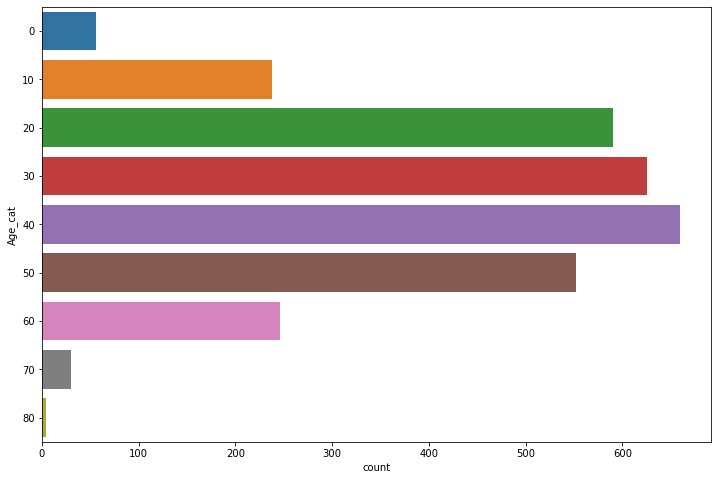

In [38]:
# 나이대 count plot
plt.figure(figsize=(12,8))
sns.countplot(y='Age_cat', data=df_train)
plt.show()

In [39]:
# 나이대별 만족도 비율
mean_by_age_cat = df_train['target'].groupby(df_train['Age_cat']).mean()
pd.DataFrame(mean_by_age_cat)

,target
Age_cat,
0,0.464286
10,0.449580
20,0.459322
30,0.539200
40,0.643399
50,0.648551
60,0.520325
70,0.500000
80,0.500000


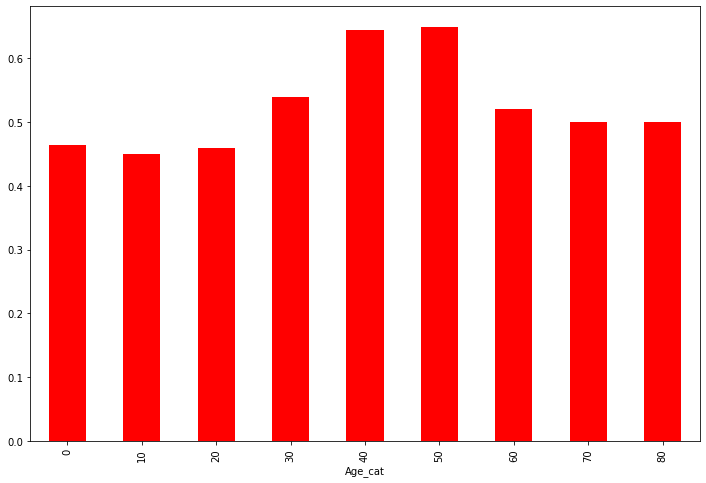

In [40]:
plt.figure(figsize=(12,8))
mean_by_age_cat.plot.bar(color='red')
plt.show()

In [41]:
# 아래에서 다시 추가
df_train.drop(['Age_cat'], axis=1, inplace=True)

### Flight distance

> 비행거리
- 어떻게 해야 한 눈에 보일까아아아아아아

In [42]:
df_train['Flight Distance'].describe()

count    3000.000000
mean     1983.079333
std      1028.109117
min        52.000000
25%      1348.250000
50%      1937.000000
75%      2547.250000
max      6882.000000
Name: Flight Distance, dtype: float64

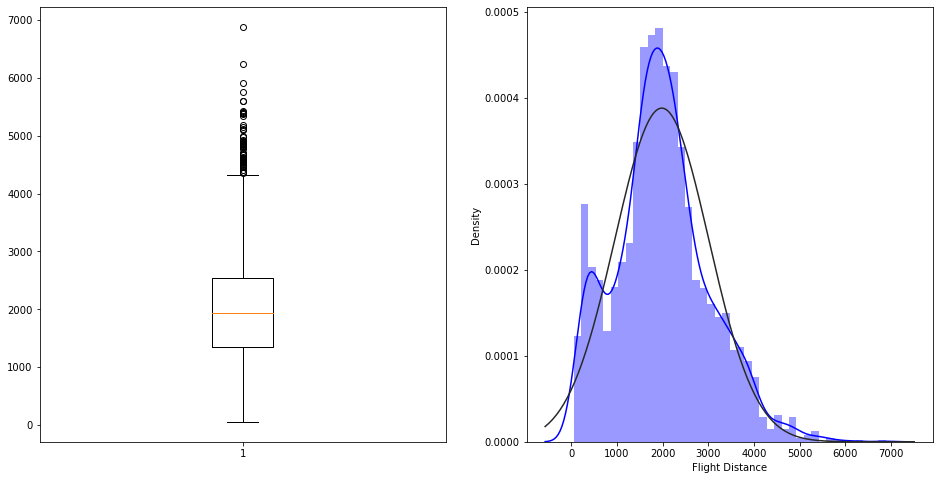

In [43]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(df_train['Flight Distance'])

plt.subplot(1,2,2)
sns.distplot(df_train['Flight Distance'], color='b',fit=stats.norm)
plt.show()

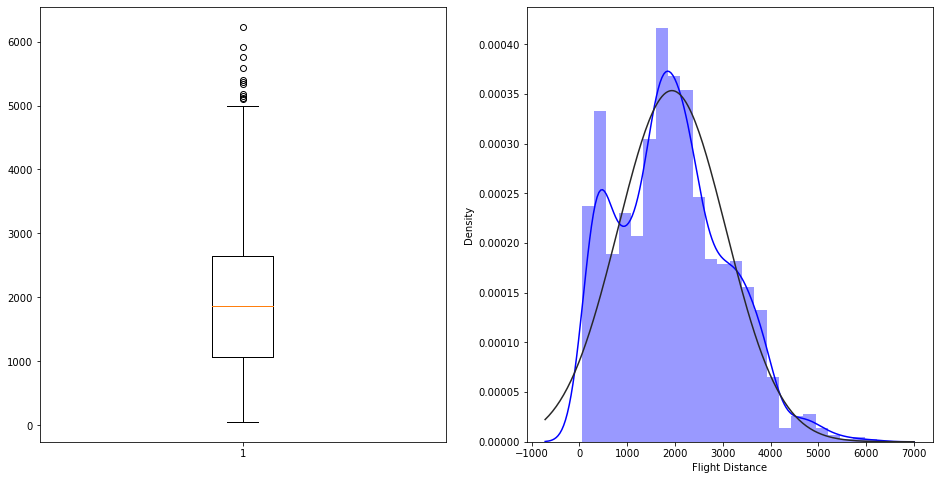

In [44]:
# 만족한 사람들 - 비행 거리
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(df_train[df_train['target'] == 1]['Flight Distance'])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['target'] == 1]['Flight Distance'], color='b',fit=stats.norm)
plt.show()

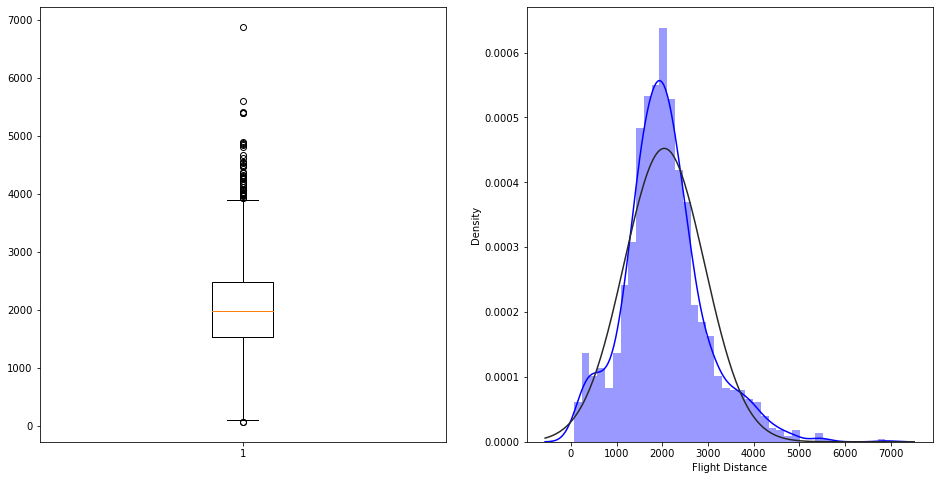

In [45]:
# 만족안한 사람들 - 비행 거리
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(df_train[df_train['target'] == 0]['Flight Distance'])

plt.subplot(1,2,2)
sns.distplot(df_train[df_train['target'] == 0]['Flight Distance'], color='b',fit=stats.norm)
plt.show()

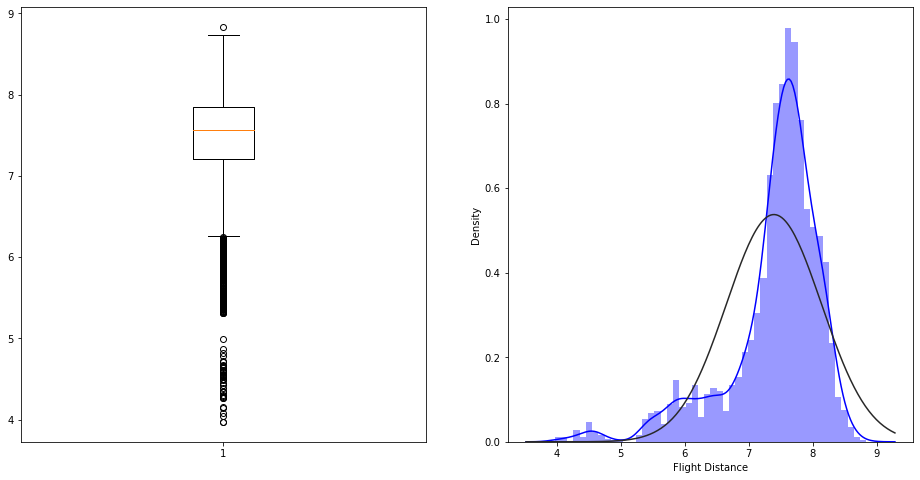

In [46]:
# log transformation 진행했을 때 오른쪽으로 편향되니 transformation 적용 X
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(df_train['Flight Distance']))

plt.subplot(1,2,2)
sns.distplot(np.log1p(df_train['Flight Distance']), color='b',fit=stats.norm)
plt.show()

### Departure Delay in Minutes

In [47]:
df_train['Departure Delay in Minutes'].describe()

count    3000.000000
mean       15.634333
std        45.083228
min         0.000000
25%         0.000000
50%         0.000000
75%        12.000000
max      1128.000000
Name: Departure Delay in Minutes, dtype: float64

In [48]:
# 출발 딜레이가 있었던 사람 수
(df_train['Departure Delay in Minutes']!=0).sum()

1295

In [49]:
# 출발 딜레이 있는 사람 중 불만족인 사람 수
((df_train['Departure Delay in Minutes']!=0)&(df_train['target']==0)).sum()

632

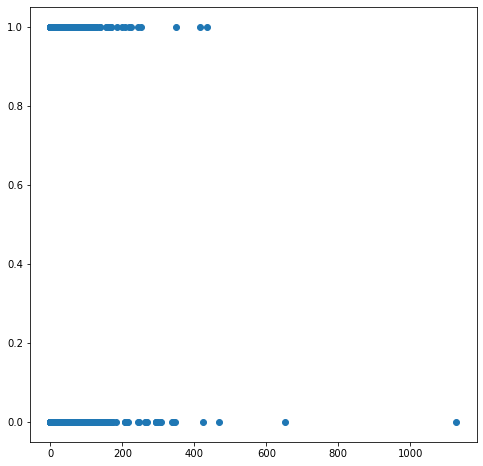

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(x=df_train['Departure Delay in Minutes'], y=df_train['target'])
plt.show()

In [51]:
df_train[df_train['Departure Delay in Minutes']>=600]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
1842,Female,disloyal Customer,39,Business travel,Eco,2431,3,3,3,3,...,5,3,1,5,4,1,4,652,638.0,0
2349,Male,Loyal Customer,8,Personal Travel,Eco,3017,2,5,2,2,...,4,4,3,5,1,3,1,1128,1115.0,0


In [52]:
# 만족한 사람들 중 딜레이된 시간이 가장 긴 사람
np.where(df_train['Departure Delay in Minutes'] == 435)

(array([592], dtype=int64),)

### Arrival Delay in Minutes

> 도착 지연

In [53]:
df_train['Arrival Delay in Minutes'].describe()

count    3000.000000
mean       15.922000
std        45.203411
min         0.000000
25%         0.000000
50%         0.000000
75%        13.000000
max      1115.000000
Name: Arrival Delay in Minutes, dtype: float64

In [54]:
print(((df_train['Departure Delay in Minutes']!=0) & (df_train['Arrival Delay in Minutes']==0)).sum())
print(((df_train['Departure Delay in Minutes']==0) & (df_train['Arrival Delay in Minutes']!=0)).sum())

289
333


## Correlation

In [58]:
from sklearn.preprocessing import LabelEncoder
corr_df = df_train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

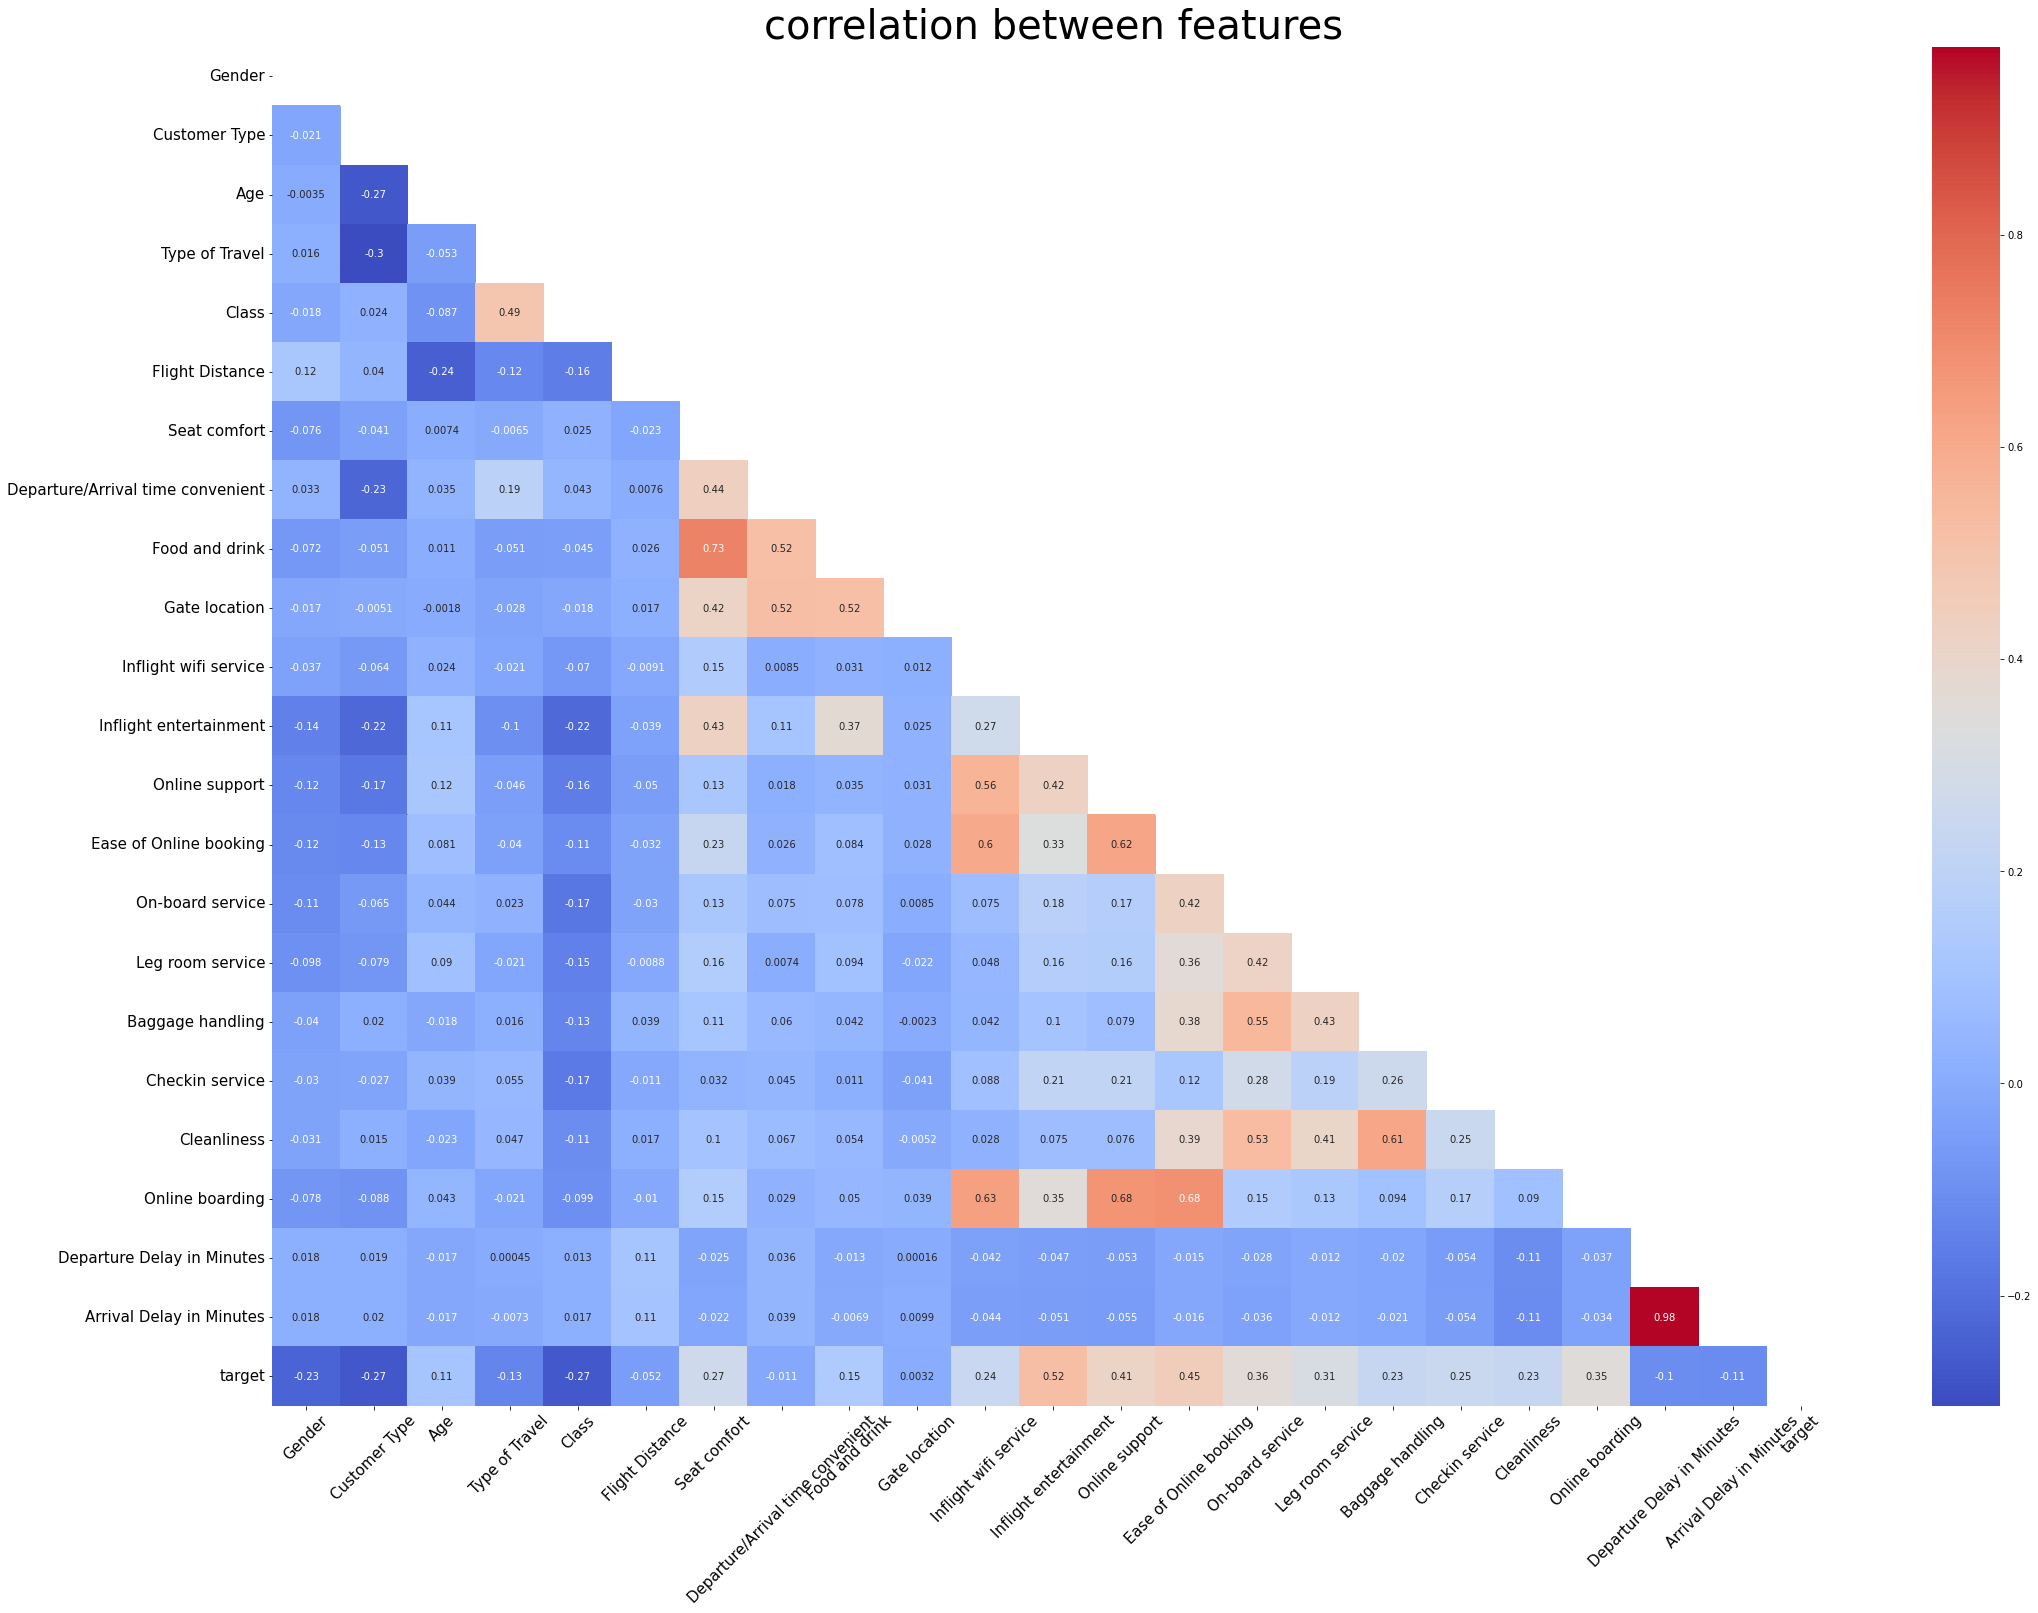

In [59]:
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# Feature Engineering

## Age to category

In [60]:
def age_categorize(age):
    age = (age // 10) * 10
    return age

In [61]:
# 나이대별로 카테고리화
df_train['Age_cat'] = df_train['Age'].apply(age_categorize).astype('category')
df_test['Age_cat'] = df_test['Age'].apply(age_categorize).astype('category')

In [62]:
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 출발 지연 & 도착 지연

> 출발 지연 & 도착 지연
- 출발 지연이 있으면 도착 지연이 있을거라 생각했지만 긴 시간동안 출발지연이 된 경우만 해당하고, 사소하게 딜레이 된 것은 한 쪽이 0일 수 있음.
- 그래서 두 피쳐의 평균만 사용하겠음

In [63]:
df_train['Delay'] = (df_train['Departure Delay in Minutes'] + df_train['Arrival Delay in Minutes'])/2
df_test['Delay'] = (df_test['Departure Delay in Minutes'] + df_test['Arrival Delay in Minutes'])/2

In [64]:
df_train.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1, inplace=True)
df_test.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1, inplace=True)

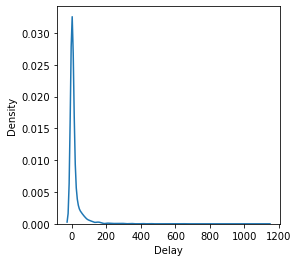

In [65]:
# 좌측에 치우쳐짐
plt.figure(figsize=(4,4))
sns.kdeplot(df_train['Delay'])
plt.show()

In [66]:
df_train['Delay'] = np.log1p(df_train['Delay'])
df_test['Delay'] = np.log1p(df_test['Delay'])

## 0이 있는 이산형 Feature

In [67]:
zero_feat = ['Seat comfort', 'Food and drink', 'Inflight entertainment', 'Leg room service']

In [68]:
# Seat comfort
for feat in zero_feat:
    print(feat)
    print(df_train[feat][df_train['Seat comfort']==0].value_counts(), '\n')

Seat comfort
0    106
Name: Seat comfort, dtype: int64 

Food and drink
0    100
1      5
3      1
Name: Food and drink, dtype: int64 

Inflight entertainment
0    44
5    28
4    23
1     5
3     4
2     2
Name: Inflight entertainment, dtype: int64 

Leg room service
5    22
4    21
2    21
3    19
1    15
0     8
Name: Leg room service, dtype: int64 



In [69]:
# Inflight entertainment
for feat in zero_feat:
    print(feat)
    print(df_train[feat][df_train['Inflight entertainment']==0].value_counts(), '\n')

Seat comfort
0    44
5     9
1     9
2     5
4     3
3     3
Name: Seat comfort, dtype: int64 

Food and drink
0    68
5     5
Name: Food and drink, dtype: int64 

Inflight entertainment
0    73
Name: Inflight entertainment, dtype: int64 

Leg room service
5    21
3    15
2    15
4    13
1     9
Name: Leg room service, dtype: int64 



In [70]:
# Food and drink
for feat in zero_feat:
    print(feat)
    print(df_train[feat][df_train['Food and drink']==0].value_counts(), '\n')

Seat comfort
0    100
1     12
2      6
5      4
4      4
3      3
Name: Seat comfort, dtype: int64 

Food and drink
0    129
Name: Food and drink, dtype: int64 

Inflight entertainment
0    68
5    25
4    22
3     6
2     4
1     4
Name: Inflight entertainment, dtype: int64 

Leg room service
5    30
3    24
4    23
2    23
1    18
0    11
Name: Leg room service, dtype: int64 



In [71]:
# Leg room service
for feat in zero_feat:
    print(feat)
    print(df_train[feat][df_train['Leg room service']==0].value_counts(), '\n')

Seat comfort
0    8
1    2
4    1
Name: Seat comfort, dtype: int64 

Food and drink
0    11
Name: Food and drink, dtype: int64 

Inflight entertainment
5    5
3    4
4    1
2    1
Name: Inflight entertainment, dtype: int64 

Leg room service
0    11
Name: Leg room service, dtype: int64 



In [72]:
# Seat comfort랑 Food and drink가 0이면 무조건 만족이다 -> 그냥 대충 적은 듯
df_train['target'][(df_train['Seat comfort']==0) &(df_train['Food and drink']==0)].value_counts()

1    100
Name: target, dtype: int64

In [73]:
# Seat comfort랑 Leg room service가 0이면 무조건 만족이다 
df_train['target'][(df_train['Leg room service']==0) &(df_train['Seat comfort']==0)].value_counts()

1    8
Name: target, dtype: int64

In [74]:
# Inflight entertainment와 Food and drink
df_train['Inflight entertainment'][(df_train['Food and drink']==0) & (df_train['Seat comfort']==0)].value_counts()

0    44
5    25
4    22
3     4
1     3
2     2
Name: Inflight entertainment, dtype: int64

In [76]:
# 위의 근거들로 0인 값을 5로 변경
# 원래의 피쳐를 변경하면 다음 줄에서 오류 발생해서 새로운 피쳐 생성하고 기존 피쳐 제거
def zero_process(df):
    df['Seat comfort_trans'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 5, df['Seat comfort'])
    df['Food and drink_trans'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 5, df['Food and drink'])
    df['Leg room service_trans'] = np.where((df['Seat comfort'] == 0) & (df['Leg room service'] == 0), 5, df['Leg room service'])
    
    df.drop(['Seat comfort', 'Food and drink', 'Leg room service'], axis=1, inplace=True)
    
    return df

In [77]:
# 위의 경우에 해당하는 경우에 1, 아니면 0인 피쳐 생성
def zero_process2(df):
    df['Seat comfort zero'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 1, 0)
    df['Food and drink zero'] = np.where((df['Seat comfort'] == 0) & (df['Food and drink'] == 0), 1, 0)
    df['Leg room service zero'] = np.where((df['Seat comfort'] == 0) & (df['Leg room service'] == 0), 1, 0)
    
    return df

In [78]:
# df_train = zero_process2(df_train)
# df_test = zero_process2(df_test)

In [79]:
# df_train = zero_process(df_train)
# df_test = zero_process(df_test)

## One-hot encoding

In [80]:
dummy_feat = list(df_train.dtypes[df_train.dtypes=='object'].index)

In [81]:
df_train = pd.get_dummies(df_train, columns = dummy_feat)
df_test = pd.get_dummies(df_test, columns = dummy_feat)

## Feature drop

> 피쳐 제거
- id - 학습에 관련없음 -> 앞에서 삭제함
- Food and drink - Seat comfort와의 다중 공선성과 많은 결측치
- Departure/Arrival time convenient - 많은 결측치 및 target과의 낮은 상관계수
- Inflight entertainment - target과 낮은 상관계수 (0을 어떻게 처리할지 모르겠음)
- Online support  - target과 낮은 상관계수
- Ease of Online booking  - target과 낮은 상관계수

In [82]:
df_train.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)
df_test.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)

# Modeling

> 평가산식
- 정확도 : accuracy

In [83]:
X = df_train.drop('target', axis=1).values
y = df_train['target'].values

X_sub = df_test.values

In [84]:
from pycaret.classification import *

clf1 = setup(data = df_train,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 22)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [85]:
#상위 모델 4개를 선택
best = compare_models(n_select=4, fold = 10,
                      cross_validation=True,
                     sort='Accuracy') 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9257,0.9772,0.9386,0.9316,0.9347,0.8484,0.8493,0.2970
lightgbm,Light Gradient Boosting Machine,0.9242,0.9785,0.9369,0.9309,0.9335,0.8455,0.8466,0.2180
et,Extra Trees Classifier,0.9219,0.9749,0.9352,0.9284,0.9314,0.8406,0.8417,0.1060
gbc,Gradient Boosting Classifier,0.9209,0.9713,0.9386,0.9237,0.9307,0.8386,0.8396,0.1740
rf,Random Forest Classifier,0.9161,0.9695,0.9294,0.9239,0.9263,0.8290,0.8299,0.1120
dt,Decision Tree Classifier,0.8804,0.8781,0.8957,0.8948,0.8946,0.7564,0.7578,0.0110
lr,Logistic Regression,0.8733,0.9398,0.8941,0.8844,0.8888,0.7415,0.7425,0.8050
ridge,Ridge Classifier,0.8709,0.0000,0.8882,0.8852,0.8864,0.7369,0.7375,0.0100
lda,Linear Discriminant Analysis,0.8709,0.9375,0.8882,0.8852,0.8864,0.7369,0.7375,0.0170
ada,Ada Boost Classifier,0.8661,0.9339,0.8806,0.8836,0.8817,0.7275,0.7285,0.0570


In [86]:
blend_4_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_4_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9476,0.9874,0.9412,0.9655,0.9532,0.8938,0.8941
1,0.9238,0.9718,0.9160,0.9478,0.9316,0.8457,0.8463
2,0.9238,0.9763,0.9664,0.9055,0.9350,0.8432,0.8458
3,0.9095,0.9653,0.9160,0.9237,0.9198,0.8160,0.8160
4,0.9190,0.9787,0.9580,0.9048,0.9306,0.8337,0.8356
5,0.9381,0.9842,0.9496,0.9417,0.9456,0.8738,0.8738
6,0.9095,0.9704,0.9580,0.8906,0.9231,0.8136,0.8168
7,0.9476,0.9872,0.9496,0.9576,0.9536,0.8935,0.8935
8,0.9429,0.9887,0.9412,0.9573,0.9492,0.8839,0.8841
9,0.9139,0.9803,0.9322,0.9167,0.9244,0.8244,0.8245


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9123,0.9776,0.9353,0.9032,0.9190,0.8235,0.8241


,Flight Distance,Delay,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,...,Age_cat_20,Age_cat_30,Age_cat_40,Age_cat_50,Age_cat_60,Age_cat_70,Age_cat_80,target,Label,Score
0,974.0,0.405465,1,1,1,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0.7791
1,1236.0,3.198673,1,1,1,1,0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9956
2,2065.0,2.708050,1,1,0,0,1,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5213
3,2934.0,1.098612,1,1,1,1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9533
4,3119.0,2.079442,1,1,0,0,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9175
5,4113.0,0.000000,0,1,1,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.7239
6,2233.0,4.248495,1,0,1,1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7202
7,4188.0,1.609438,0,0,1,1,0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6609
8,2522.0,1.386294,1,1,0,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9981
9,534.0,3.178054,1,1,1,1,0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8833


In [87]:
final_blend_4_soft = finalize_model(blend_4_soft)
prediction = predict_model(final_blend_4_soft, data = df_test)

# Submission

In [88]:
submission = pd.read_csv("./data/sample_submission.csv")
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [89]:
submission.to_csv("./data/submission_pycaret_4.csv",index=False)